<a href="https://colab.research.google.com/github/preenet/961733_64_2/blob/main/961733_week7_(MLR_and_tuning_SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ensures that all matplotlib plots will be plotted in the output cell within the notebook and will be kept in the notebook when saved.
# reload all modules before executing a new line
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Multi Linear Regression and Support Vector Machine with ENB2012 dataset
https://archive.ics.uci.edu/ml/datasets/energy+efficiency  

https://www.sciencedirect.com/science/article/abs/pii/S037877881200151X  
https://www.ijisae.org/IJISAE/article/view/619/pdf  




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1. Import Dataset

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
df = pd.read_excel(path+'ENB2012_data.xlsx')

## 2. Exploration

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
df.X6.unique()
df['X8'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
X = df.iloc[:,:8]
Y = df.iloc[:,8:10]

## 3. Transform

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [ ]:
# round for multi-classification problem (4 class problem)
y1 = df['Y1'].astype(int)
y2 = df['Y2'].astype(int)


In [ ]:
y1 = [round(i, -1) for i in y1]
y2 = [round(i, -1) for i in y2]

## 4. Modeling and evalualtion

**Baseline classfier with Random forest default**

In [ ]:
# try classification problem
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.2, random_state = 0)

clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Rough Accuracy rate%:",metrics.accuracy_score(y_test, y_pred)*100)

Rough Accuracy rate%: 96.75324675324676


**Baseline model with Random forest**

In [ ]:
# you can use Kfold method from sklearn.model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 10, shuffle = True, random_state = False)
cv_scores_test = []
testing_error = []
rf= RandomForestRegressor(n_estimators = 100, random_state = 1)
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index,0], Y[test_index,0]
  rf.fit(X_train, y_train)
  y_test_pred = rf.predict(X_test)      
  
  cv_scores_test = mean_absolute_error(y_test, y_test_pred)
  testing_error.append(cv_scores_test)

In [ ]:
print('crosss validation RF MAE. is:', np.mean(testing_error))

crosss validation RF MAE. is: 0.030832831036662522


**[Experiment 1]Multiple Linear Regression, since the paper didn't do train/valid/test, we will only do train/valid here** 

In [ ]:
# its pretty simple just like linear regression with more terms (a2X2+a3X3,...anXn)
from sklearn.linear_model import LinearRegression

reg = LinearRegression()  
reg.fit(X_train, y_train) #training the algorithm


#the intercept:
print ('intecept at y axis at', reg.intercept_)
#retrieving the slope for all x:
print ('Slope are', reg.coef_)

y_pred = reg.predict(X_test)

intecept at y axis at -0.025302304918391774
Slope are [-5.46052405e-01 -3.09449975e+13  1.53261537e+13  3.17339503e+13
  7.61718750e-01 -1.11770630e-02  2.52540588e-01  4.03747559e-02]


In [ ]:
# lets see the mae results
print('MLR Mean absolute error is', mean_absolute_error(y_test, y_pred) )


MLR Mean absolute error is 0.17329770838655376


the results still not that good comparing to the paper

In [ ]:
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pd.set_option('display.max_rows',df2.shape[0]+1)
df2

,Actual,Predicted
0,-0.233764,0.209073
1,-1.580501,-1.509677
2,-1.144151,-1.318271
3,0.750008,0.522043
4,0.456463,0.425870
5,1.054462,1.045010
6,-1.184811,-1.392490
7,-1.112416,-1.254794
8,-1.053905,-1.132735
9,-1.052914,-1.163985


we can do scatter plots for every independents vs Y1, but its boring

**[Experiment 1] use Kfold, cv=10 from model_selection, default SVR**

In [ ]:
from sklearn.svm import SVR
# predicting Y1
cv_scores_test = []
testing_error = []
model = SVR(kernel='linear')
for train_index, test_index in cv.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index,0], Y[test_index,0]
  model.fit(X_train, y_train)
  y_test_pred = model.predict(X_test)      
  cv_scores_test = mean_absolute_error(y_test, y_test_pred)
  testing_error.append(cv_scores_test)

In [ ]:
print('SVR with linar kernel, crosss validation MAE. is:', np.mean(testing_error))

SVR with linar kernel, crosss validation MAE. is: 0.20101721445280568


**[Experiment 2] kernel = linear, use cross_val_scoree cv=10, plot**
**Use cross_val_score from model_selection and plot Train vs CV**


In [ ]:
# split data
import statistics
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y[:, 0], test_size = 0.2, random_state = 0)

# predict Y1
scores_cv = []
scores_train =[]
scores_test = []
models = []

# C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.
# for large C you will have small margin, and for will look for larger margin, even if the hyper-plane miss
# classified more observation points.
C = [0.001, 0.01, 0.1, 1, 10, 100, 200,500, 1000]
# check sklearn.metrics.SCORERS.keys()

for k in C:
  model = SVR(kernel = 'linear')
  scores = cross_val_score(model, X_train, y_train, scoring ="neg_mean_absolute_error", cv=10)
  scores*=-1
  scores_cv.append( np.mean(scores) )
  model.fit(X_train, y_train)

  y_pred_train = model.predict(X_train)
  scores_train.append(mean_absolute_error(y_train, y_pred_train))

  y_pred_test = model.predict(X_test)
  scores_test.append(mean_absolute_error(y_test, y_pred_test) )
  models.append(model)


SVR with linear kernel doesn't give us an impression with difference in C for the dataset

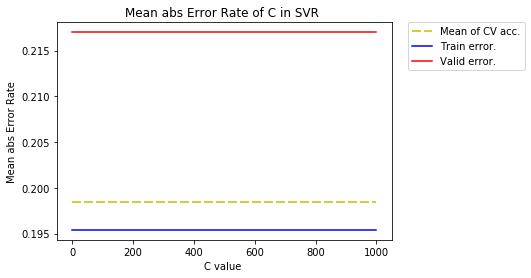

<Figure size 432x288 with 0 Axes>

In [ ]:
# comparing CV scores, train and test scores

plt.plot(C, scores_cv, 'y', dashes=[6, 2], label = "Mean of CV acc.")
plt.plot(C, scores_train, 'b', label = "Train error.")
plt.plot(C, scores_test, 'r', label= "Valid error.")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('C value ')
plt.ylabel('Mean abs Error Rate')
plt.title('Mean abs Error Rate of C in SVR ')
plt.show()
plt.savefig('SVR_CV_Train_Test' + '.png', dpi=900)

**[Experiment 3] Use python GridSearchCV method from model_selection - coarse grid search**

In [ ]:
# In python tuning hyper-parem for SVM is easy by using GrideSearCV from model_selection
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200,500, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500, 1000]}

# use cv= 5 for bias and fast results :(
model2 = GridSearchCV(SVR(kernel='rbf'), params, scoring = 'neg_mean_absolute_error', cv=5)
model2.fit(X_train, y_train)
print(model2.best_params_)

{'C': 500, 'gamma': 0.1}


In [ ]:
model2.cv_results_

{'mean_fit_time': array([0.01618018, 0.01553392, 0.01621475, 0.014258  , 0.02066803,
        0.01431427, 0.01343908, 0.01278028, 0.01262202, 0.01568394,
        0.01522136, 0.01425109, 0.01439233, 0.02301393, 0.01450171,
        0.01325316, 0.01263905, 0.01282568, 0.01539211, 0.0123971 ,
        0.0106277 , 0.01372743, 0.02162261, 0.01503496, 0.01402302,
        0.01314931, 0.01384425, 0.01236949, 0.01191301, 0.02178535,
        0.03025656, 0.03433681, 0.02201004, 0.02076197, 0.02065663,
        0.01991725, 0.01428847, 0.02337976, 0.05451517, 0.02845769,
        0.04083266, 0.02713571, 0.02521043, 0.02434855, 0.02412171,
        0.0246141 , 0.05926595, 0.13698936, 0.02867813, 0.04108849,
        0.02675486, 0.02509599, 0.02398305, 0.02429113, 0.02878976,
        0.11387663, 0.1386724 , 0.02979851, 0.04074039, 0.02656698,
        0.02522941, 0.0243216 , 0.02394438, 0.04398541, 0.2457356 ,
        0.13942633, 0.02819471, 0.0412693 , 0.02656212, 0.02514734,
        0.02394924, 0.02449851,

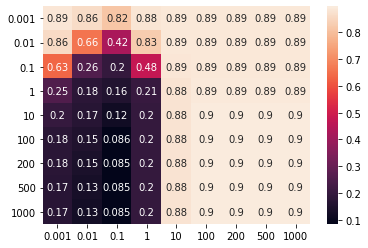

In [ ]:
#visualize the parameter dependency with the models
import seaborn as sns
results_df = pd.DataFrame(model2.cv_results_)
#negate them and you get the MSE
results_df['mean_test_score'] *= -1
scores = np.array(results_df.mean_test_score).reshape(9, 9)

sns.heatmap(scores, annot=True, xticklabels=params['gamma'], yticklabels=params['C'])

Remember the paper used RF to get MAE = 0.51 std .11 for Y1

In [ ]:
# now do fine medium search
C = np.arange(1000, 1010, 1)
g = np.arange(0, 1, 0.1)
params_m = {'C': C, 'gamma': g}
          

In [ ]:
model3 = GridSearchCV(SVR(kernel='rbf'), params_m, scoring = 'neg_mean_absolute_error', cv=5)
model3.fit(X_train, y_train)
print(model3.best_params_)

{'C': 1000, 'gamma': 0.1}


In [ ]:

best_model = SVR(kernel='rbf', gamma =.1, C=1000, verbose =True)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)  
mae = mean_absolute_error(y_test, y_test_pred)
print('optimal modeL return MAE of:', mae)

[LibSVM]optimal modeL return MAE of: 0.08703919247973263


**[Experiment set up 4] Peform fine grid search**

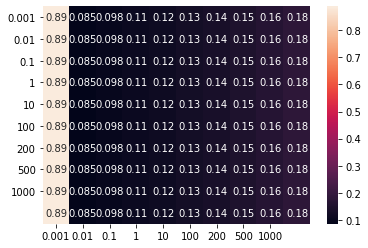

In [ ]:
results_df = pd.DataFrame(model3.cv_results_)
#negate them and you get the MSE
results_df['mean_test_score'] *= -1
scores = np.array(results_df.mean_test_score).reshape(10, 10)

sns.heatmap(scores, annot=True, xticklabels=params['gamma'], yticklabels=params['C'])

**[final check with 10 cv]**

In [ ]:
final_model = SVR(kernel = 'rbf', C=1000, gamma= 0.1)
scores = cross_val_score(final_model, X_train, y_train, scoring ="neg_mean_absolute_error", cv=10)
scores *= -1
std = np.std(scores)

optimal_mae = np.mean(scores)
print('optimal SVR model =', optimal_mae, ' with std:',std)

optimal SVR model = 0.07906955004477448  with std: 0.005391018725560369


**[Cross check with the two paper above]**
